In [2]:
!pip3 uninstall tensorflow
!pip3 install tensorflow==1.15

!git clone https://github.com/matterport/Mask_RCNN.git

%cd Mask_RCNN
!python setup.py install
!pip show mask-rcnn

%cd ..

from google.colab import drive
drive.mount('/content/drive')

%cd Mask_RCNN/

from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN

from os import listdir
from xml.etree import ElementTree

%cd ..

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 412.3MB 36kB/s 
     |████████████████████████████████| 512kB 29.6MB/s 
     |████████████████████████████████| 3.8MB 42.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=1ee32b7c7c7090f1ebf73f9128e9e3b41daf59648b0c595749125176ba4234e6
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have 

Using TensorFlow backend.


/content


In [3]:
# -*- coding: utf-8 -*-
"""ra2_evaluators.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1TL0__YdBIt5BC_YsBdhpCTXejSB3Ue_3
"""

# Commented out IPython magic to ensure Python compatibility.
#@title Install dependencies

#!pip3 uninstall tensorflow
#!pip3 install tensorflow==1.15

#!git clone https://github.com/matterport/Mask_RCNN.git

# %cd Mask_RCNN
#!python setup.py install
#!pip show mask-rcnn

# %cd ..
#!pip3 install imgaug

#@title Mount the Google Drive

#from google.colab import drive
#drive.mount('/content/drive')


#@title General training constants

EARLY_STOPPING = False

EPOCHS = 100
FOLDS = 5
VERBOSE= 2

PATIENCE=60

# Commented out IPython magic to ensure Python compatibility.
#@title Import Mask R-CNN dependencies

# %cd Mask_RCNN/

from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN

from os import listdir
from xml.etree import ElementTree

# %cd ..

#@title Configurations for pre-trained joint extractors

max_instances_to_detect = 128

FEET_REGIONS = 6
HAND_REGIONS = 11
WRIST_REGIONS = 6

MODEL_DIR = '/output/logs'
SAVE_MODELS = False

OUTPUT_LOGS = True
LOG_OUTPUT_PATH = 'drive/My Drive/Work/ML/RA2/ra2/example_output/'

class FeetJointsConfig(Config):
    # give the configuration a recognizable name
    NAME = "FeetJoints_config"

    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # number of classes (we would normally add +1 for the background)
     # kangaroo + BG
    NUM_CLASSES = FEET_REGIONS + 1

    # Number of training steps per epoch
    #STEPS_PER_EPOCH = 1
    #VALIDATION_STEPS = 1

    #Select backbone: resnet50 or resnet101
    BACKBONE = "resnet101"

    #Image resizing
    #IMAGE_RESIZE_MODE = "square"
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    #IMAGE_MIN_SCALE = 2.0

    #RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)

    # Learning rate
    LEARNING_RATE=0.001

    # Set lower confidence threshold
    DETECTION_MIN_CONFIDENCE = 0.0

    # setting Max ground truth instances
    MAX_GT_INSTANCES=FEET_REGIONS

    # max detected instances
    DETECTION_MAX_INSTANCES = max_instances_to_detect


class HandJointsConfig(Config):
    # give the configuration a recognizable name
    NAME = "HandJoints_config"

    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # number of classes (we would normally add +1 for the background)
     # kangaroo + BG
    NUM_CLASSES = HAND_REGIONS + 1

    # Number of training steps per epoch
    #STEPS_PER_EPOCH = max(1, train_samples // IMAGES_PER_GPU)
    #VALIDATION_STEPS = max(1, val_samples // IMAGES_PER_GPU)

    #Select backbone: resnet50 or resnet101
    BACKBONE = "resnet101"

    #Image resizing
    #IMAGE_RESIZE_MODE = "square"
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    #IMAGE_MIN_SCALE = 2.0

    #RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)

    # Learning rate
    LEARNING_RATE=0.001

    # Set lower confidence threshold
    DETECTION_MIN_CONFIDENCE = 0.0

    # setting Max ground truth instances
    MAX_GT_INSTANCES=HAND_REGIONS

    # max detected instances
    DETECTION_MAX_INSTANCES = max_instances_to_detect

class WristJointsConfig(Config):
    # give the configuration a recognizable name
    NAME = "WristJoints_config"

    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # number of classes (we would normally add +1 for the background)
     # kangaroo + BG
    NUM_CLASSES = WRIST_REGIONS + 1

    # Number of training steps per epoch
    #STEPS_PER_EPOCH = max(1, train_samples // IMAGES_PER_GPU)
    #VALIDATION_STEPS = max(1, val_samples // IMAGES_PER_GPU)

    #Select backbone: resnet50 or resnet101
    BACKBONE = "resnet101"

    #Image resizing
    #IMAGE_RESIZE_MODE = "square"
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256
    #IMAGE_MIN_SCALE = 2.0

    MEAN_PIXEL = [117.8, 117.8, 117.8]
    USE_MINI_MASK = False

    #RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)

    # Learning rate
    LEARNING_RATE=0.001

    # Set lower confidence threshold
    DETECTION_MIN_CONFIDENCE = 0.0

    # setting Max ground truth instances
    MAX_GT_INSTANCES=6

    # max detected instances
    DETECTION_MAX_INSTANCES = max_instances_to_detect


f_config = FeetJointsConfig()
h_config = HandJointsConfig()
w_config = WristJointsConfig()

#@title Paths definition


TRAIN_PATH      = 'drive/My Drive/Work/ML/RA2/ra2/train/'
DATAFRAME_PATH  = '/content/drive/My Drive/Work/ML/RA2/ra2/train/training.csv' #example_input/small_test.csv'

TEST_SET_PATH = 'drive/My Drive/Work/ML/RA2/ra2/train/'
TEST_DATAFRAME_PATH = DATAFRAME_PATH#'/content/drive/My Drive/Work/ML/RA2/ra2/example_input/small_test.csv'
OUTPUT_DATAFRAME_PATH = 'drive/My Drive/Work/ML/RA2/ra2/example_output/predictions.csv'

MODEL_OUTPUT_PATH = 'drive/My Drive/Work/ML/RA2/ra2/example_output/'

HAND_DETECTOR_PATH    = '/content/drive/My Drive/Work/ML/RA2/ra2/hands_subset/weights/model_6/mrcnn_hand_mrcnn_class_loss_best-200.hdf5'
FEET_DETECTOR_PATH    = '/content/drive/My Drive/Work/ML/RA2/ra2/feet_subset/weights/model_5/mrcnn_feet_mrcnn_class_loss_best-160.hdf5'
WRIST_E_DETECTOR_PATH = '/content/drive/My Drive/Work/ML/RA2/ra2/wrist_subset/erosion/mrcnn_we_loss_best-320.hdf5'
WRIST_N_DETECTOR_PATH = '/content/drive/My Drive/Work/ML/RA2/ra2/wrist_subset/narrowing/weights/model1/mrcnn_wn_mrcnn_class_loss_best-320.hdf5'

DENSENET121_WEIGHT_PATH_NO_TOP = '/content/drive/My Drive/Work/ML/RA2/other/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5'
DENSENET169_WEIGHT_PATH_NO_TOP = '/content/drive/My Drive/Work/ML/RA2/other/densenet169_weights_tf_dim_ordering_tf_kernels_notop.h5'
DENSENET201_WEIGHT_PATH_NO_TOP = '/content/drive/My Drive/Work/ML/RA2/other/densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5'


#@title Image sizes setup

HAND_REGION_SCALE = 1.2
FEET_REGION_SCALE = 1.2

WRIST_E_REGION_SCALE = 1.2
WRIST_N_REGION_SCALE = 1.2

FEET_REGION_IMAGE_SHAPE    = (128, 128,  3)
FINGER_REGION_IMAGE_SHAPE  = (128, 128,  3)
WRIST_TEMP_REGION_IMAGE_SHAPE  = (512, 512, 3)
WRIST_E_REGION_IMAGE_SHAPE = (128, 128,  3)
WRIST_N_REGION_IMAGE_SHAPE = (128, 128,  3)

FEET_EROSION_MODEL_INPUT_SIZE = (128, 128, 3)
HAND_EROSION_MODEL_INPUT_SIZE = (128, 128, 3)
FEET_NARROWING_MODEL_INPUT_SIZE = (64, 64, 3)
HAND_NARROWING_MODEL_INPUT_SIZE = FEET_NARROWING_MODEL_INPUT_SIZE

WRIST_EROSION_MODEL_INPUT_SIZE = HAND_EROSION_MODEL_INPUT_SIZE
WRIST_NARROWING_MODEL_INPUT_SIZE = HAND_NARROWING_MODEL_INPUT_SIZE

#@title Detectors's region names

FEET_DETECTOR_REGION_NAMES = {
    0 : 'background',
    1 : 'mtp_1',
    2 : 'mtp_2',
    3 : 'mtp_3',
    4 : 'mtp_4',
    5 : 'mtp_5',
    6 : 'mtp_ip',
}

HAND_DETECTOR_REGION_NAMES = {
    0 : 'background',
    1 : 'pip_1',
    2 : 'pip_2',
    3 : 'pip_3',
    4 : 'pip_4',
    5 : 'pip_5',
    6 : 'mcp_1',
    7 : 'mcp_2',
    8 : 'mcp_3',
    9 : 'mcp_4',
    10 : 'mcp_5',
    11 : 'carp',
}

WRIST_N_DETECTOR_REGION_NAMES = {
    0 : 'background',
    1 : 'cmc3',
    2 : 'cmc4',
    3 : 'cmc5',
    4 : 'mna',
    5 : 'capnlun',
    6 : 'radcar',
}

WRIST_E_DETECTOR_REGION_NAMES = {
    0 : 'background',
    1 : 'mc1',
    2 : 'mul',
    3 : 'nav',
    4 : 'lunate',
    5 : 'ulna',
    6 : 'radius',
}

#@title Column names

LF_NARROWING_REGION_NAMES = [
    'LF_mtp_J__1',
    'LF_mtp_J__2',
    'LF_mtp_J__3',
    'LF_mtp_J__4',
    'LF_mtp_J__5',
    'LF_mtp_J__ip',
]

RF_NARROWING_REGION_NAMES = [
    'RF_mtp_J__1',
    'RF_mtp_J__2',
    'RF_mtp_J__3',
    'RF_mtp_J__4',
    'RF_mtp_J__5',
    'RF_mtp_J__ip',
]

LF_EROSION_REGION_NAMES = [
    'LF_mtp_E__1',
    'LF_mtp_E__2',
    'LF_mtp_E__3',
    'LF_mtp_E__4',
    'LF_mtp_E__5',
    'LF_mtp_E__ip',
]

RF_EROSION_REGION_NAMES = [
    'RF_mtp_E__1',
    'RF_mtp_E__2',
    'RF_mtp_E__3',
    'RF_mtp_E__4',
    'RF_mtp_E__5',
    'RF_mtp_E__ip',
]

LH_FINGER_EROSION_REGION_NAMES = [
    'LH_mcp_E__ip',
    'LH_pip_E__2',
    'LH_pip_E__3',
    'LH_pip_E__4',
    'LH_pip_E__5',
    'LH_mcp_E__1',
    'LH_mcp_E__2',
    'LH_mcp_E__3',
    'LH_mcp_E__4',
    'LH_mcp_E__5',
]

RH_FINGER_EROSION_REGION_NAMES = [
    'RH_mcp_E__ip',
    'RH_pip_E__2',
    'RH_pip_E__3',
    'RH_pip_E__4',
    'RH_pip_E__5',
    'RH_mcp_E__1',
    'RH_mcp_E__2',
    'RH_mcp_E__3',
    'RH_mcp_E__4',
    'RH_mcp_E__5',
]

LH_FINGER_NARROWING_REGION_NAMES = [
    'LH_pip_J__2',
    'LH_pip_J__3',
    'LH_pip_J__4',
    'LH_pip_J__5',
    'LH_mcp_J__1',
    'LH_mcp_J__2',
    'LH_mcp_J__3',
    'LH_mcp_J__4',
    'LH_mcp_J__5',
]

RH_FINGER_NARROWING_REGION_NAMES = [
    'RH_pip_J__2',
    'RH_pip_J__3',
    'RH_pip_J__4',
    'RH_pip_J__5',
    'RH_mcp_J__1',
    'RH_mcp_J__2',
    'RH_mcp_J__3',
    'RH_mcp_J__4',
    'RH_mcp_J__5',
]

LH_WRIST_EROSION_REGION_NAMES = [
    'LH_wrist_E__mc1',
    'LH_wrist_E__mul',
    'LH_wrist_E__nav',
    'LH_wrist_E__lunate',
    'LH_wrist_E__ulna',
    'LH_wrist_E__radius',
]

RH_WRIST_EROSION_REGION_NAMES = [
    'RH_wrist_E__mc1',
    'RH_wrist_E__mul',
    'RH_wrist_E__nav',
    'RH_wrist_E__lunate',
    'RH_wrist_E__ulna',
    'RH_wrist_E__radius',
]

LH_WRIST_NARROWING_REGION_NAMES = [
    'LH_wrist_J__cmc3',
    'LH_wrist_J__cmc4',
    'LH_wrist_J__cmc5',
    'LH_wrist_J__mna',
    'LH_wrist_J__capnlun',
    'LH_wrist_J__radcar',
]

RH_WRIST_NARROWING_REGION_NAMES = [
    'RH_wrist_J__cmc3',
    'RH_wrist_J__cmc4',
    'RH_wrist_J__cmc5',
    'RH_wrist_J__mna',
    'RH_wrist_J__capnlun',
    'RH_wrist_J__radcar',
]

#@title Max scores per evaluation

HAND_EROSION_SCALING = 6
HAND_NARROWING_SCALING = 5

FEET_EROSION_SCALING = 11
FEET_NARROWING_SCALING = 5

#@title Create detectors and load weights

feet_detector    = modellib.MaskRCNN(mode="inference", config=f_config, model_dir=MODEL_DIR)
hand_detector    = modellib.MaskRCNN(mode="inference", config=h_config, model_dir=MODEL_DIR)
wrist_e_detector = modellib.MaskRCNN(mode="inference", config=w_config, model_dir=MODEL_DIR)
wrist_n_detector = modellib.MaskRCNN(mode="inference", config=w_config, model_dir=MODEL_DIR)

feet_detector.load_weights(FEET_DETECTOR_PATH, by_name=True)
hand_detector.load_weights(HAND_DETECTOR_PATH, by_name=True)
wrist_e_detector.load_weights(WRIST_E_DETECTOR_PATH, by_name=True)
wrist_n_detector.load_weights(WRIST_N_DETECTOR_PATH, by_name=True)

#@title Read example dataframe with labels

import pandas as pd
import numpy as np
import cv2

#pd.read_csv(DATAFRAME_PATH).head()

#@title Auxilary drawing function

#import matplotlib.pyplot as plt

#def get_ax(rows=1, cols=1, size=8):
    # """Return a Matplotlib Axes array to be used in
    # all visualizations in the notebook. Provide a
    # central point to control graph sizes.
    #
    # Change the default size attribute to control the size
    # of rendered images
    # """
    # _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    # return ax

#@title Functions to extract regions and fix errors

from copy import deepcopy

def fix_feet_misclassification(instances):

  #Order in which missing regions will be fixed
  #Most important -> less important
  priority_order = [1, 6, 2, 3, 4, 5]

  #Define, which classes where not detected
  classes_to_detect = sorted(FEET_DETECTOR_REGION_NAMES.keys())[1:]
  empty_classes = set(classes_to_detect) - set(instances.keys())
  empty_classes = list(empty_classes)
  empty_classes = [ item for item in priority_order if item in empty_classes ] #Sort empty classes according to the priority order

  fixed_instances = deepcopy(instances)

  detected_instances_count = sum(
      [ len(item) for key, item in instances.items() ]
  )

  #Look for a missing region in another class's detections
  for empty_class in empty_classes:

    if empty_class == 6:#If mtp_ip not detected

      if(len(fixed_instances[1]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[1].pop(1) ] #Use the second activation of mtp_1

    elif empty_class == 1: #If mtp_1 not detected

      if(len(fixed_instances[6]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[6].pop(1) ] #Use the second activation of mtp_ip

    elif empty_class == 2:#If mtp_2 not detected

      if(len(fixed_instances[3]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[3].pop(1) ] #Use the second activation of mtp_3

      elif (len(fixed_instances[4]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[4].pop(1) ] #Use the second activation of mtp_4

    elif empty_class == 3:#If mtp_3 not detected, may be the most common case

      if (len(fixed_instances[4]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[4].pop(1) ] #Use the second activation of mtp_4

      elif(len(fixed_instances[2]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[2].pop(1) ] #Use the second activation of mtp_2

    elif empty_class == 4:#If mtp_4 not detected, may be the second most common case

      if (len(fixed_instances[3]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[3].pop(1) ]#Use the second activation of mtp_3

      elif(len(fixed_instances[2]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[2].pop(1) ]#Use the second activation of mtp_2

    elif empty_class == 5:#If mtp_5 not detected

      if (len(fixed_instances[6]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[6].pop(1) ]#Use the second activation of mtp_ip

      elif(len(fixed_instances[1]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[1].pop(1) ]#Use the second activation of mtp_1

      elif(len(fixed_instances[4]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[4].pop(1) ]#Use the second activation of mtp_4

  return fixed_instances

def fix_hands_misclassification(instances):

  #Order in which missing regions will be fixed
  #Most important -> less important
  priority_order = [11, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5] #carp, mcp, pip

  #Define, which classes where not detected
  classes_to_detect = sorted(HAND_DETECTOR_REGION_NAMES.keys())[1:]
  empty_classes = set(classes_to_detect) - set(instances.keys())
  empty_classes = list(empty_classes)
  empty_classes = [ item for item in priority_order if item in empty_classes ] #Sort empty classes according to the priority order

  fixed_instances = deepcopy(instances)

  detected_instances_count = sum(
      [ len(item) for key, item in instances.items() ]
  )

  #Look for a missing region in another class's detections
  for empty_class in empty_classes:

    if empty_class == 6:#If mcp_1 not detected

      if(len(fixed_instances[10]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[10].pop(1) ] #Use the second activation of mcp_5

      elif (len(fixed_instances[1]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[1].pop(1) ] #Use the second activation of pip_1

    elif empty_class == 7:#If mcp_2 not detected

      if(len(fixed_instances[8]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[8].pop(1) ] #Use the second activation of mcp_3

      elif (len(fixed_instances[9]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[9].pop(1) ] #Use the second activation of mcp_4

    elif empty_class == 8:#If mcp_3 not detected

      if (len(fixed_instances[9]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[9].pop(1) ] #Use the second activation of mcp_4

      elif(len(fixed_instances[7]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[7].pop(1) ] #Use the second activation of mcp_2

    elif empty_class == 9:#If mcp_4 not detected

      if (len(fixed_instances[8]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[8].pop(1) ]#Use the second activation of mcp_3

      elif(len(fixed_instances[7]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[7].pop(1) ]#Use the second activation of mcp_2

    elif empty_class == 10:#If mcp_5 not detected

      if(len(fixed_instances[6]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[6].pop(1) ]#Use the second activation of mcp_1

      elif(len(fixed_instances[9]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[9].pop(1) ]#Use the second activation of mcp_4

    elif empty_class == 1:#If pip_1 not detected

      if(len(fixed_instances[6]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[6].pop(1) ] #Use the second activation of mcp_1

      elif (len(fixed_instances[5]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[5].pop(1) ] #Use the second activation of pip_5

    elif empty_class == 2:#If pip_2 not detected

      if(len(fixed_instances[3]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[3].pop(1) ] #Use the second activation of pip_3

      elif (len(fixed_instances[4]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[4].pop(1) ] #Use the second activation of pip_4

    elif empty_class == 3:#If pip_3 not detected

      if (len(fixed_instances[4]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[4].pop(1) ] #Use the second activation of pip_4

      elif(len(fixed_instances[2]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[2].pop(1) ] #Use the second activation of pip_2

    elif empty_class == 4:#If pip_4 not detected

      if (len(fixed_instances[2]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[2].pop(1) ]#Use the second activation of pip_2

      elif(len(fixed_instances[3]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[3].pop(1) ]#Use the second activation of pip_3

    elif empty_class == 5:#If pip_5 not detected

      if(len(fixed_instances[1]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[1].pop(1) ]#Use the second activation of pip_5

      elif(len(fixed_instances[6]) > 1):
        fixed_instances[empty_class] = [ fixed_instances[6].pop(1) ]#Use the second activation of mcp_1

  return fixed_instances

def extract_regions(detector, image, classes_num, fix_function):
  result = detector.detect([ image ], verbose=0)
  result = result[0]

  #Reshape masks from a 3d [H, W, Instances] tensor to the array of masks
  masks = []
  for i in range(result['masks'].shape[2]):
    masks.append(result['masks'][:, :, i])

  #Reshape dictionary to list
  result = list(zip(
      result['rois'],
      result['class_ids'],
      result['scores'],
      masks
  ))

  groupped = dict()

  #Group detected instances by class
  for item in result:
    roi, class_id, score, mask = item

    if class_id not in groupped.keys():
      groupped[class_id] = []

    groupped[class_id].append((score, roi, mask))

  #Sort each group by confidence scores
  for key in groupped.keys():
    groupped[key] = sorted(groupped[key], key = lambda x: x[0], reverse=True)

  detected_classes = len(list(groupped.keys()))


  #Ensure the model has detected all needed regions
  misclassified = False

  #Some joints may be misclassified, in most cases it may be fixed in trivial way
  if detected_classes < classes_num:
    groupped = fix_function(groupped)
    misclassified = True

  #Take max confidence result for each class as a region proposal
  result = dict(
      [ (key, groupped[key][0]) for key in groupped.keys() ]
  )

  return result, misclassified

def convert_to_original_format(instances):
  #Reshape { class : (score, roi, mask) } dictionary to the format the results are yielded by models
  #Useful for visualization with MRCNN built-in functions
  classes, rois, scores, masks = [], [], [], []

  for key, value in instances.items():
    score, roi, mask = value

    classes.append(key)
    rois.append(roi)
    scores.append(score)
    masks.append(mask)

  result = {
      'rois' : np.array(rois),
      'scores' : np.array(scores),
      'class_ids' : np.array(classes),
      'masks' : np.array(masks).swapaxes(0,2).swapaxes(0,1)
  }

  return result

def extract_regions_from_image(image, result, scale=1.0):
  regions = dict()

  for class_, region in zip(result['class_ids'], result['rois']):
    #Rescale the box
    x1, y1, x2, y2, = region
    cx, cy = (x2 + x1)/2, (y2 + y1)/2
    x1, x2 = int((x1-cx) * scale + cx), int((x2-cx) * scale + cx)
    y1, y2 = int((y1-cy) * scale + cy), int((y2-cy) * scale + cy)

    #Yes, yes, i know, y-axis is the 0 axis, but whatever
    x1, x2, y1, y2 = max(0, x1), min(x2, image.shape[0]), max(0, y1), min(y2, image.shape[1])

    regions[class_] = image[ x1:x2, y1:y2 ]

  return regions

#@title Extract regions from images

def apply_detector(detector, image, classes_num, scale, fix_function=lambda x: x):
  regions, misclassified = extract_regions(detector, image, classes_num, fix_function)

  #Convert function output to the Matterport format compatible with their functions
  regions = convert_to_original_format(regions)

  #TODO: Create an output for badly classified image

  regions = extract_regions_from_image(image, regions, scale)
  return regions

def process_wrist(image):
  #Erosion and narrowing regions
  E, N = dict(), dict()

  if image is not None:
    image = cv2.resize(image, WRIST_TEMP_REGION_IMAGE_SHAPE[:2])
    E, N = apply_detector(wrist_e_detector, image, WRIST_REGIONS, WRIST_E_REGION_SCALE), \
           apply_detector(wrist_n_detector, image, WRIST_REGIONS, WRIST_N_REGION_SCALE)

  return E, N

def read_training_dataset(dataframe_path, images_path):
  ExtractedRegions = dict()

  df = pd.read_csv(dataframe_path)

  for i, P_ID in enumerate(df['Patient_ID']):
    PatientRegions = {
        'info' : df[ df['Patient_ID'] == P_ID ]
    }

    #Compose full image filenames
    LF = images_path + P_ID + '-LF.jpg'
    RF = images_path + P_ID + '-RF.jpg'
    LH = images_path + P_ID + '-LH.jpg'
    RH = images_path + P_ID + '-RH.jpg'

    #Read images
    LF, RF, LH, RH = cv2.imread(LF), cv2.imread(RF), cv2.imread(LH), cv2.imread(RH)

    #Flip right limb images since detectors were trained on left limb images only
    RF, RH = np.flip(RF, axis=1), np.flip(RH, axis=1)

    #Extract regions from images
    LF, RF, LH, RH = apply_detector(feet_detector, LF, FEET_REGIONS, FEET_REGION_SCALE, fix_feet_misclassification),  \
                     apply_detector(feet_detector, RF, FEET_REGIONS, FEET_REGION_SCALE, fix_feet_misclassification),  \
                     apply_detector(hand_detector, LH, HAND_REGIONS, HAND_REGION_SCALE, fix_hands_misclassification), \
                     apply_detector(hand_detector, RH, HAND_REGIONS, HAND_REGION_SCALE, fix_hands_misclassification)

    LW = LH.pop(11, None) #Get the wrist image for further segmentation
    RW = RH.pop(11, None)

    LWE, LWN, RWE, RWN = *process_wrist(LW), *process_wrist(RW)

    PatientRegions['LF']  = LF
    PatientRegions['RF']  = RF
    PatientRegions['LH']  = LH
    PatientRegions['RH']  = RH
    PatientRegions['LWE'] = LWE
    PatientRegions['LWN'] = LWN
    PatientRegions['RWE'] = RWE
    PatientRegions['RWN'] = RWN

    ExtractedRegions[P_ID] = PatientRegions

    if (not ( (i + 1) % 50 )) or (i + 1) == len(df['Patient_ID']):
      print('Applied detectors on', i + 1, 'PIDs')

  return ExtractedRegions

#@title Functions to build numpy arrays from image metadata and extracted regions

def get_sorted_patient_data(region_dictionary):
  region_dictionary = sorted(
      list( region_dictionary.items() ), key = lambda x: x[0]
  )
  return region_dictionary

def form_feet_datasets(sorted_region_data):
  Images  = []
  Erosion = []
  Narrowing = []

  for PID, data in sorted_region_data:
    info = data['info']

    sorted_LF_data = sorted(
        list( data['LF'].items() ), key = lambda x: x[0]
    )

    for region_class, image in sorted_LF_data:
      image = cv2.resize(image, FEET_REGION_IMAGE_SHAPE[:2])

      erosion_score_column   = LF_EROSION_REGION_NAMES   [ region_class - 1 ]
      narrowing_score_column = LF_NARROWING_REGION_NAMES [ region_class - 1 ]

      erosion_score   = list( info[ erosion_score_column   ] )[0]
      narrowing_score = list( info[ narrowing_score_column ] )[0]

      Images.append(image)
      Erosion.append(erosion_score)
      Narrowing.append(narrowing_score)

    sorted_RF_data = sorted(
        list( data['RF'].items() ), key = lambda x: x[0]
    )

    for region_class, image in sorted_RF_data:
      image = cv2.resize(image, FEET_REGION_IMAGE_SHAPE[:2])

      erosion_score_column   = RF_EROSION_REGION_NAMES   [ region_class - 1 ]
      narrowing_score_column = RF_NARROWING_REGION_NAMES [ region_class - 1 ]

      erosion_score   = list( info[ erosion_score_column   ] )[0]
      narrowing_score = list( info[ narrowing_score_column ] )[0]

      Images.append(image)
      Erosion.append(erosion_score)
      Narrowing.append(narrowing_score)

  return np.array(Images), np.array(Erosion), np.array(Narrowing)

def form_hand_datasets(sorted_region_data):
  ErosionImages = []
  ErosionLabels = []

  NarrowingImages = []
  NarrowingLabels = []

  for PID, data in sorted_region_data:
    info = data['info']

    sorted_LH_data = sorted(
        list( data['LH'].items() ), key = lambda x: x[0]
    )

    for region_class, image in sorted_LH_data:
      image = cv2.resize(image, FINGER_REGION_IMAGE_SHAPE[:2])

      erosion_score_column   = LH_FINGER_EROSION_REGION_NAMES[ region_class - 1 ]
      narrowing_score_column = LH_FINGER_NARROWING_REGION_NAMES[ region_class - 2 ] if region_class > 1 else None

      erosion_score   = list( info[ erosion_score_column   ] )[0]

      ErosionImages.append(image)
      ErosionLabels.append(erosion_score)

      if narrowing_score_column is not None:
        narrowing_score = list( info[ narrowing_score_column ] )[0]

        NarrowingImages.append(image)
        NarrowingLabels.append(narrowing_score)

    sorted_RH_data = sorted(
        list( data['RH'].items() ), key = lambda x: x[0]
    )

    for region_class, image in sorted_RH_data:
      image = cv2.resize(image, FINGER_REGION_IMAGE_SHAPE[:2])

      erosion_score_column   = RH_FINGER_EROSION_REGION_NAMES[ region_class - 1 ]
      narrowing_score_column = RH_FINGER_NARROWING_REGION_NAMES[ region_class - 2 ] if region_class > 1 else None

      erosion_score   = list( info[ erosion_score_column   ] )[0]

      ErosionImages.append(image)
      ErosionLabels.append(erosion_score)

      if narrowing_score_column is not None:
        narrowing_score = list( info[ narrowing_score_column ] )[0]

        NarrowingImages.append(image)
        NarrowingLabels.append(narrowing_score)

  return np.array(ErosionImages), np.array(ErosionLabels), np.array(NarrowingImages), np.array(NarrowingLabels)

def form_wrist_erosion_dataset(sorted_region_data):
  Images = []
  Labels = []

  for PID, data in sorted_region_data:
    info = data['info']

    sorted_LWE_data = sorted(
        list( data['LWE'].items() ), key = lambda x: x[0]
    )

    for region_class, image in sorted_LWE_data:
      image = cv2.resize(image, WRIST_E_REGION_IMAGE_SHAPE[:2])

      score_column = LH_WRIST_EROSION_REGION_NAMES[ region_class - 1 ]
      score = list( info[ score_column ] )[0]

      Images.append(image)
      Labels.append(score)

    sorted_RWE_data = sorted(
        list( data['RWE'].items() ), key = lambda x: x[0]
    )

    for region_class, image in sorted_RWE_data:
      image = cv2.resize(image, WRIST_E_REGION_IMAGE_SHAPE[:2])

      score_column = RH_WRIST_EROSION_REGION_NAMES[ region_class - 1 ]
      score = list( info[ score_column ] )[0]

      Images.append(image)
      Labels.append(score)

  return np.array(Images), np.array(Labels)

def form_wrist_narrowing_dataset(sorted_region_data):
  Images = []
  Labels = []

  for PID, data in sorted_region_data:
    info = data['info']

    sorted_LWN_data = sorted(
        list( data['LWN'].items() ), key = lambda x: [0]
    )

    for region_class, image in sorted_LWN_data:
      image = cv2.resize(image, WRIST_N_REGION_IMAGE_SHAPE[:2])

      score_column = LH_WRIST_NARROWING_REGION_NAMES[ region_class - 1 ]
      score = list( info[ score_column ] )[0]

      Images.append(image)
      Labels.append(score)

    sorted_RWN_data = sorted(
        list( data['RWN'].items() ), key = lambda x: x[0]
    )

    for region_class, image in sorted_RWN_data:
      image = cv2.resize(image, WRIST_N_REGION_IMAGE_SHAPE[:2])

      score_column = RH_WRIST_NARROWING_REGION_NAMES[ region_class - 1]
      score = list( info[ score_column ] )[0]

      Images.append(image)
      Labels.append(score)

  return np.array(Images), np.array(Labels)


#@title Dataset processing functions

def normalize_labels(vector, smoothing=0.0, max_value = None):
  #Normalizes integer non-negative values to [0, 1] interval
  #Smoothing value in range [0, 1] shifts value to the center

  #If no scale value provided, get the max
  if max_value is None or max_value < np.max(vector):
    max_value = np.max(vector)

  #Normalize
  vector = vector.astype(np.float64) / max_value

  #Smooth
  smooth = lambda x: (0.5 + (x - 0.5) * (1 - smoothing))
  return np.array([
          smooth(value) for value in vector
  ])

def denormalize_labels(vector, max_value, smoothing=0.0):
  #Inverse operation, denormalizes [0, 1] values to [0, N] range

  extend = lambda x: (0.5 + (x - 0.5) / (1 - smoothing))
  vector = np.array([ extend(value) for value in vector ]) * max_value
  
  vector = np.maximum(0, vector)
  vector = np.minimum(max_value, vector)

  return vector

def downsample_class(samples, labels, multiplier, target_class):
  #Get classes represented in data set, and their sample counts
  classes, counts = np.unique(labels, return_counts=True)

  #Compute index of the class to downsample
  for i, class_ in enumerate(classes):
    if class_ == target_class:
      target_class = i
      break

  #Compute the count of the downsampled class's samples
  target_count = int(counts[target_class] * multiplier)

  output_data   = []
  output_labels = []

  #Permute the data set
  permutation = np.random.permutation(len(labels))
  samples = [ samples[i] for i in permutation ]
  labels  = [ labels[ i] for i in permutation]

  #Counter for already sampled samples of class to downsample
  sampled_values = 0

  #Traverse the data set
  for i in range(len(samples)):
    if labels[i] == classes[target_class]:
      if sampled_values >= target_count:
        pass
      else:
        sampled_values += 1

        output_data.append(samples[i])
        output_labels.append(labels[i])
    else:
      output_data.append(samples[i])
      output_labels.append(labels[i])

  return np.array(output_data), np.array(output_labels)

def train_test_split(data, labels, split):
  permutation = np.random.permutation(range(labels.shape[0]))

  split = int(labels.shape[0] * split)
  train_indices, val_indices = permutation[:split], permutation[split:]

  return data[train_indices], labels[train_indices], data[val_indices], labels[val_indices]

def balanced_train_test_split(data, labels, split, rounding='trunc'):
  #Initialize dict with labels as keys and empty
  data_per_label = dict([ (label, []) for label in np.unique(labels) ])
  [ data_per_label[label].append(sample) for sample, label in zip(data, labels) ]

  #Select function which will round the train sample count in certain class
  #Distinct effect only on classes with few samples
  rounding_functions = {
      'trunc'  : lambda x: int(x),
      'round'  : lambda x: int(round(x)),
      'random' : lambda x: int(x) if np.random.rand() < 0.5 else int(round(x))
  }
  rounding = rounding_functions[rounding]

  x_train, y_train, x_valid, y_valid = [], [], [], []

  #Permute samples of several class and split them into train/val according to 'split' value
  for label, sample_list in data_per_label.items():
    permutation = np.random.permutation(len(sample_list))
    separator = rounding(split * len(permutation))
    sample_list = [ sample_list[i] for i in permutation ]

    [ (x_train.append(sample_list[i]), y_train.append(label)) for i in permutation[:separator] ]
    [ (x_valid.append(sample_list[i]), y_valid.append(label)) for i in permutation[separator:] ]

  #Permute splitted sets
  train_permutation = np.random.permutation(len(x_train))
  valid_permutation = np.random.permutation(len(x_valid))

  x_train, y_train = [ x_train[i] for i in train_permutation ], [ y_train[i] for i in train_permutation ]
  x_valid, y_valid = [ x_valid[i] for i in valid_permutation ], [ y_valid[i] for i in valid_permutation ]

  return np.array(x_train), np.array(y_train), np.array(x_valid), np.array(y_valid)

def naive_oversampling(data, labels):
  labels = np.array(labels)

  classes, frequencies = np.unique(labels, return_counts=True) #labels count

  oversampled_count = np.max(frequencies) * len(frequencies) - data.shape[0] #oversampled data size

  frequencies = np.max(frequencies) * 1 / frequencies #inverse values to convert them to sampling weights
  frequencies = frequencies - frequencies[np.argmin(frequencies)]  #do not oversample the most common class

  oversampled_data = np.zeros(
      shape = (oversampled_count,) + data.shape[1:],
      dtype = data.dtype
  )

  oversampled_labels = np.zeros(
      shape = oversampled_count,
      dtype = labels.dtype
  )

  frequencies = np.array([
            frequencies[np.argwhere( classes == class_ ).flat[0]] for class_ in labels
  ])
  frequencies = frequencies / np.sum(frequencies)

  indices = np.random.choice(data.shape[0], size = oversampled_count, p = frequencies)

  for i, index in enumerate(indices):
    oversampled_data[i] = data[index]
    oversampled_labels[i] = labels[index]

  return np.concatenate([data, oversampled_data], axis=0), np.concatenate([labels, oversampled_labels], axis=0)

def downsample_most_common_class(data, labels):
  #Downsamples the most common class to the values number of the second common class
  classes, frequencies = np.unique(labels, return_counts=True)
  second_maximum, first_maximum = sorted(frequencies)[-2], sorted(frequencies)[-1]
  downsample_factor = second_maximum / first_maximum
  class_to_downsample = classes[ np.argmax(frequencies) ]

  return downsample_class(data, labels, downsample_factor, class_to_downsample)

#@title Modified DenseNet definition

import numpy as np

from keras import backend as K
from keras import layers
from keras import models

import keras.utils as keras_utils

from keras_applications import imagenet_utils
from keras_applications.imagenet_utils import decode_predictions
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.layers import SpatialDropout2D

alpha = 0.2

def dense_block(x, blocks, growth_rate, name, regularizer_factory):
    for i in range(blocks):
        x = conv_block(x, growth_rate, name=name + '_block' + str(i + 1), regularizer_factory=regularizer_factory)
    return x

def sd_dense_block(x, blocks, growth_rate, name, min_dropout_rate, max_dropout_rate, regularizer_factory):

  bn_axis = 3 if K.image_data_format() == 'channels_last' else 1

  rates = np.linspace(
      start=min_dropout_rate,
      stop=max_dropout_rate,
      num=blocks,
      endpoint=True
  )

  outputs = [x]

  for i in range(blocks):
    rates_slice = rates[:i+1]
    block_name = name + '_block' + str(i + 1)

    specific_block_input = [ SpatialDropout2D(rate)(x) for rate, x in zip(rates_slice, outputs) ]
    if len(specific_block_input) > 1:
      specific_block_input = layers.Concatenate(axis=bn_axis, name=block_name + '_concat')(specific_block_input)
    else:
      specific_block_input = specific_block_input[0]

    output = sd_conv_block(specific_block_input, growth_rate, name=block_name, regularizer_factory=regularizer_factory)
    outputs = [output] + outputs

  return layers.Concatenate(axis=bn_axis, name=name + '_concat')(outputs)

def transition_block(x, reduction, name, regularizer_factory):

    bn_axis = 3 if K.image_data_format() == 'channels_last' else 1
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                  name=name + '_bn')(x)
    x = layers.LeakyReLU(alpha=alpha, name=name + '_relu')(x)
    x = layers.Conv2D(int(K.int_shape(x)[bn_axis] * reduction), 1,
                      use_bias=False,
                      name=name + '_conv',
                      kernel_regularizer=regularizer_factory())(x)
    x = layers.AveragePooling2D(2, strides=2, name=name + '_pool')(x)
    return x


def conv_block(x, growth_rate, name, regularizer_factory):
    bn_axis = 3 if K.image_data_format() == 'channels_last' else 1

    x1 = layers.BatchNormalization(axis=bn_axis,
                                   epsilon=1.001e-5,
                                   name=name + '_0_bn')(x)
    x1 = layers.LeakyReLU(alpha=alpha, name=name + '_0_relu')(x1)
    x1 = layers.Conv2D(4 * growth_rate, 1,
                       use_bias=False,
                       name=name + '_1_conv',
                       kernel_regularizer=regularizer_factory())(x1)
    x1 = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                   name=name + '_1_bn')(x1)
    x1 = layers.LeakyReLU(alpha=alpha, name=name + '_1_relu')(x1)
    x1 = layers.Conv2D(growth_rate, 3,
                       padding='same',
                       use_bias=False,
                       name=name + '_2_conv',
                       kernel_regularizer=regularizer_factory())(x1)
    x = layers.Concatenate(axis=bn_axis, name=name + '_concat')([x, x1])
    return x

def sd_conv_block(x, growth_rate, name, regularizer_factory):
    bn_axis = 3 if K.image_data_format() == 'channels_last' else 1

    x1 = layers.BatchNormalization(axis=bn_axis,
                                   epsilon=1.001e-5,
                                   name=name + '_0_bn')(x)
    x1 = layers.LeakyReLU(alpha=alpha, name=name + '_0_relu')(x1)
    x1 = layers.Conv2D(4 * growth_rate, 1,
                       use_bias=False,
                       name=name + '_1_conv',
                       kernel_regularizer=regularizer_factory())(x1)
    x1 = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                   name=name + '_1_bn')(x1)
    x1 = layers.LeakyReLU(alpha=alpha, name=name + '_1_relu')(x1)
    x1 = layers.Conv2D(growth_rate, 3,
                       padding='same',
                       use_bias=False,
                       name=name + '_2_conv',
                       kernel_regularizer=regularizer_factory())(x1)

    return x1


def DenseNet(blocks,
             include_top=True,
             weights=DENSENET121_WEIGHT_PATH_NO_TOP,
             input_tensor=None,
             input_shape=None,
             pooling=None,
             classes=1000,
             blocks_to_include=3,
             include_large_conv=False,
             min_dropout_rate=0.0,
             max_dropout_rate=0.0,
             regularizer_factory=lambda: None,
             growth_rate = 32,
             max_pool = True):

    if not (weights in {'imagenet', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `imagenet` '
                         '(pre-training on ImageNet), '
                         'or the path to the weights file to be loaded.')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as `"imagenet"` with `include_top`'
                         ' as true, `classes` should be 1000')

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=32,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top,
                                      weights=weights)

    if input_tensor is None:
        img_input = layers.Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    bn_axis = 3 if K.image_data_format() == 'channels_last' else 1

    if include_large_conv:
      x = layers.ZeroPadding2D(padding=((3, 3), (3, 3)))(img_input)
      x = layers.Conv2D(2 * growth_rate, 7, strides=2, use_bias=False, name='conv1/conv', kernel_regularizer=regularizer_factory())(x)
    else:
      #new layer
      x = layers.Conv2D(2 * growth_rate, 7, use_bias=False, padding='same', name='conv1/conv_replaced', kernel_regularizer=regularizer_factory())(img_input)

    x = layers.BatchNormalization(
        axis=bn_axis, epsilon=1.001e-5, name='conv1/bn')(x)
    x = layers.LeakyReLU(alpha=alpha, name='conv1/relu')(x)
    if max_pool:
      x = layers.ZeroPadding2D(padding=((1, 1), (1, 1)))(x)
      x = layers.MaxPooling2D(3, strides=2, name='pool1')(x)

    if abs(max_dropout_rate) < 1e-4: #If dropout rate defined as zero, use non-dropout version
      x = dense_block(x, blocks[0], growth_rate, name='conv2', regularizer_factory=regularizer_factory)
      x = transition_block(x, 0.5, name='pool2',  regularizer_factory=regularizer_factory)
      x = dense_block(x, blocks[1], growth_rate, name='conv3', regularizer_factory=regularizer_factory)
      if blocks_to_include > 2:
        x = transition_block(x, 0.5, name='pool3',  regularizer_factory=regularizer_factory)
        x = dense_block(x, blocks[2], growth_rate, name='conv4', regularizer_factory=regularizer_factory)
      if blocks_to_include > 3:
        x = transition_block(x, 0.5, name='pool4',  regularizer_factory=regularizer_factory)
        x = dense_block(x, blocks[3], growth_rate, name='conv5', regularizer_factory=regularizer_factory)
    else: #If non-zero dropout rate, use specialized dropout blocks
      x = sd_dense_block(x, blocks[0], growth_rate, 'conv2', min_dropout_rate, max_dropout_rate, regularizer_factory=regularizer_factory)
      x = transition_block(x, 0.5, 'pool2', regularizer_factory=regularizer_factory)
      x = sd_dense_block(x, blocks[1], growth_rate, 'conv3', min_dropout_rate, max_dropout_rate, regularizer_factory=regularizer_factory)
      if blocks_to_include > 2:
        x = transition_block(x, 0.5, 'pool3', regularizer_factory=regularizer_factory)
        x = sd_dense_block(x, blocks[2], growth_rate, 'conv4', min_dropout_rate, max_dropout_rate, regularizer_factory=regularizer_factory)
      if blocks_to_include > 3:
        x = transition_block(x, 0.5, 'pool4', regularizer_factory=regularizer_factory)
        x = sd_dense_block(x, blocks[3], growth_rate, 'conv5', min_dropout_rate, max_dropout_rate, regularizer_factory=regularizer_factory)

    bn_name = 'bn'
    if blocks_to_include < 3:
      bn_name = 'bn_replaced'

    x = layers.BatchNormalization(
        axis=bn_axis, epsilon=1.001e-5, name=bn_name)(x)
    x = layers.LeakyReLU(alpha=alpha, name='relu')(x)

    if include_top:
        x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = layers.Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        elif pooling == 'max':
            x = layers.GlobalMaxPooling2D(name='max_pool')(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = keras_utils.get_source_inputs(input_tensor)
    else:
        inputs = img_input

    # Create model.

    #Compute conv layers number to name the model 'densenetX'

    true_blocks = blocks[:blocks_to_include]
    model_name = sum([1] + list(map(lambda x: x * 2 + 1, true_blocks)))
    model_name = 'densenet' + str(model_name)

    model = models.Model(inputs, x, name=model_name)

    # Load weights.
    if weights is not None:
        model.load_weights(weights, by_name=True)

    return model


def ModifiedDenseNet(
      blocks_set = 121,
      weights=DENSENET121_WEIGHT_PATH_NO_TOP,
      input_shape=None,
      pooling=None,
      blocks_to_include=3,
      include_large_conv=False,
      min_dropout_rate = 0.0,
      max_dropout_rate = 0.0,
      regularizer_factory=lambda: None,
      growth_rate = 32,
      max_pool = True
    ):

    blocks = {
        121 : [6, 12, 24, 16],
        169 : [6, 12, 32, 32],
        201 : [6, 12, 48, 32]
    }
    if isinstance(blocks_set, list):
      blocks = blocks_set
    elif isinstance(blocks_set, int):
      if blocks_set in blocks.keys():
        blocks = blocks[blocks_set]
      else:
        raise ValueError('No such blocks set defined')
    else:
     blocks = blocks_set

    return DenseNet(blocks,
                    False, weights,
                    None, input_shape,
                    pooling, 1000, blocks_to_include, include_large_conv, min_dropout_rate,
                    max_dropout_rate, regularizer_factory, growth_rate, max_pool)

#@title Model defining functions

import os
#import tempfile
import re
import keras
import tensorflow as tf
from keras import backend as K
from keras.applications.resnet import ResNet50, ResNet101, ResNet152
from keras.applications.resnet_v2 import ResNet50V2, ResNet101V2, ResNet152V2
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201, preprocess_input
from keras.layers import Dense, Dropout, SpatialDropout2D
from keras.models import Model
from keras.losses import categorical_crossentropy, mean_absolute_error, mean_squared_error, logcosh
from keras.optimizers import adam, sgd
from keras import regularizers
from keras.models import model_from_json
from keras.regularizers import l1, l2


def denormalized_mae(y_true, y_pred, max_value, smoothing):
  y_true = K.constant(0.5) + (y_true - K.constant(0.5))/K.constant(1 - smoothing)
  y_pred = K.constant(0.5) + (y_pred - K.constant(0.5))/K.constant(1 - smoothing)

  y_true = y_true * max_value
  y_pred = y_pred * max_value

  return mean_absolute_error(y_true, y_pred)

def denormalized_mse(y_true, y_pred, max_value, smoothing):
  y_true = K.constant(0.5) + (y_true - K.constant(0.5))/K.constant(1 - smoothing)
  y_pred = K.constant(0.5) + (y_pred - K.constant(0.5))/K.constant(1 - smoothing)

  y_true = y_true * max_value
  y_pred = y_pred * max_value

  return mean_squared_error(y_true, y_pred)

def get_denormalized_function(max_value, func_name, smoothing):
  def mae(y_true, y_pred):
    return denormalized_mae(y_true, y_pred, max_value, smoothing)

  def mse(y_true, y_pred):
    return denormalized_mse(y_true, y_pred, max_value, smoothing)

  funcs = {
      'mae' : mae,
      'mse' : mse,
  }

  return funcs[func_name]

def get_lr_metric(optimizer): #Custom metric to monitor learning rate
  def lr(y_true, y_pred):
      return optimizer.lr
  return lr

def get_modified_densenet_estimator(name, INPUT_SHAPE, MAX_VALUE, dropout_rate=0.95,
                                    regularizer_factory=lambda: l2(1e-4), weights = DENSENET121_WEIGHT_PATH_NO_TOP,
                                    growth_rate=32, loss=mean_absolute_error, max_pool = True, blocks = 121):

  base_model = ModifiedDenseNet(
    blocks_set=blocks,
    weights=weights,
    input_shape=INPUT_SHAPE,
    pooling='avg',
    blocks_to_include=3 if isinstance(blocks, int) else len(blocks),
    include_large_conv=False,
    min_dropout_rate = 0.0,
    max_dropout_rate = dropout_rate,
    regularizer_factory=regularizer_factory,
    growth_rate = growth_rate,
    max_pool = max_pool
  )
  x = base_model.output
  #x = layers.Flatten()(x)

  x = Dense(1, name='output', activation='sigmoid')(x)

  model = Model(inputs  = base_model.input,
                outputs = x,
                name = base_model.name + '_' + name
                )

  optimizer = adam(lr=0.0001)
  #optimizer = sgd(lr=0.0001, momentum=0.9, nesterov=True)

  lr = get_lr_metric(optimizer)

  mae = get_denormalized_function(MAX_VALUE, 'mae', SMOOTHING)
  mse = get_denormalized_function(MAX_VALUE, 'mse', SMOOTHING)

  metrics = [
             mean_absolute_error,
             mean_squared_error,

             mae,
             mse,

             lr
            ]

  model.compile(optimizer=optimizer,

                #loss=mean_squared_error,
                loss=loss,
                #loss=logcosh,

                metrics=metrics)

  return model

SMOOTHING=0.0

#Functions to apply on data before fold splitting and after fold splitting
#Pre: downsampling most frequent class
#Post: oversampling and normalizing labels to [0, 1]

#def data_pre_sample(data, labels):
#  return downsample_most_common_class(data, labels)

def data_post_process(x_train, y_train, x_val, y_val, c_num, smoothing, downsample_valid = True):
  x_train, y_train = downsample_most_common_class(x_train, y_train)
  if downsample_valid:
      x_val, y_val = downsample_most_common_class(x_val, y_val)

  x_train, y_train = naive_oversampling(x_train, y_train)
  x_val,   y_val   = naive_oversampling(x_val,   y_val)

  y_train = normalize_labels(y_train, max_value = c_num - 1, smoothing=smoothing)
  y_val   = normalize_labels(y_val,   max_value = c_num - 1, smoothing=smoothing)

  return x_train, y_train, x_val, y_val

#Function to yield folds of a given samples/labels pair, applying the functions defined above
# '''def generate_folds(data, labels, scaling, label_smoothing, folds=3):
#   data, labels = data_pre_sample(data, labels)
#
#   indices     = np.arange(len(labels))
#   permutation = np.random.permutation(indices)
#   permutation = list(permutation)
#
#   fold_indices = []
#   fold_len     = len(labels) // folds
#
#   for i in range(folds):
#     fold = None
#
#     if i < folds - 1:
#       fold = np.array([ permutation.pop(-1) for i in range(fold_len) ])
#     else:
#       fold = permutation
#
#     fold_indices.append(np.array(fold))
#
#   for fold in fold_indices:
#     val_indices   = fold
#     train_indices = np.array(
#         [ x for x in indices if x not in val_indices ]
#     )
#     train_x, train_y = data[train_indices], labels[train_indices]
#     valid_x, valid_y = data[val_indices], labels[val_indices]
#
#     train_x, train_y, valid_x, valid_y = data_post_process(train_x, train_y, valid_x, valid_y, scaling, label_smoothing)
#
#     yield train_x, train_y, valid_x, valid_y'''

def generate_folds(data, labels, scaling, label_smoothing, folds=3):
  fold_separators = [ 1 - (1/( folds - i)) for i in range(folds - 1) ]
  folds = []
  for i, sep in enumerate(fold_separators):
    data, labels, fold_x, fold_y = balanced_train_test_split(data, labels, sep, 'round')
    folds.append((fold_x, fold_y))
    if i == len(fold_separators) - 1:
      folds.append((data, labels))

  for i, fold in enumerate(folds):
    train_x, train_y = [], []
    [ ( train_x.append(folds[k][0]), train_y.append(folds[k][1]) ) for k in range(len(folds)) if k != i ]

    train_x, train_y = np.array(train_x), np.array(train_y)
    train_x, train_y = np.concatenate(train_x, axis=0), np.concatenate(train_y, axis=0)

    yield data_post_process(train_x, train_y, fold[0], fold[1], scaling, label_smoothing)

from keras.preprocessing.image import ImageDataGenerator

feet_erosion_train_datagen = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True,

    horizontal_flip = True,
    rotation_range=45,

    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,

    dtype='float64'
)

feet_narrowing_train_datagen = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True,

    horizontal_flip = True,
    rotation_range=45,

    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,

    dtype='float64'
)

hand_erosion_train_datagen = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True,

    horizontal_flip = True,
    rotation_range=45,

    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,

    dtype='float64'
)

hand_narrowing_train_datagen = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True,

    horizontal_flip = True,
    rotation_range=45,

    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,

    dtype='float64'
)

wrist_erosion_train_datagen = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True,

    horizontal_flip = True,
    rotation_range=45,

    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,

    dtype='float64'
)

wrist_narrowing_train_datagen = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True,

    horizontal_flip = True,
    rotation_range=45,

    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,

    dtype='float64'
)

val_datagen = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True,

    dtype='float64'
)

#@title Visualize some augmented samples

# def normalize_image(image):
#   return (image - np.min(image))/(np.max(image) - np.min(image))
#
# def display_generator(gen, data, labels=None, n_cols=3, n_rows=2, scale = 3):
#
#   fig, ax = plt.subplots(figsize=(scale * n_cols, scale * n_rows), ncols=n_cols, nrows=n_rows)
#
#   samples = gen.flow(data, labels, batch_size=n_cols * n_rows).next()
#
#   print('Displaying images normalized to [0, 1] with mean', samples[0].mean(axis=(0,1,2)), 'and std', samples[0].std(axis=(0,1,2)))
#
#   for index, axis in enumerate(ax.flat):
#     sample = samples[0][index] if labels is not None else samples[index]
#     axis.imshow(normalize_image(sample))
#     if labels is not None:
#       label = samples[1][index]
#       axis.set_xlabel(label)
#
#   plt.show()
#
# display_generator(feet_erosion_train_datagen,    *naive_oversampling(feet_joints, feet_erosion))
# display_generator(hand_erosion_train_datagen,    *naive_oversampling(finger_erosion_images, finger_erosion))
# display_generator(wrist_erosion_train_datagen,   *naive_oversampling(wrist_erosion_images, wrist_erosion))
# display_generator(wrist_narrowing_train_datagen, *naive_oversampling(wrist_narrowing_images, wrist_narrowing))

#@title Modular live loss plotter callback

#Modular live loss plotter for Keras models
#Allows to create custom layouts of per-batch or per-epoch plots for different metrics

#Monitor class defines a plot, which either may be batch or epoch-scoped, and may contain several graphs
#Batch monitor plots its values per batch, and refreshes itself on new epoch begin
#Epoch monitor plots its values per epoch, and performs no refresh
#All values/last N values displaying
#Log-scale/Linear scale displaying

#Plotter callback handles different Monitors and responds to the actual plotting
#Defines a grid where Monitors will be drawn, grid size, refresh rate in batches
#when the Monitors will be re-drawn in addition to per-epoch update
#Plotter can be silenced to disable plotting and only archivate per-epoch data

# from IPython.display import clear_output
# from keras.callbacks import Callback
# import matplotlib.pyplot as plt
#
# class Monitor():
#     def __init__(self, scope='epoch', monitors= [ 'loss' ], plot_last=-1, log_scale=False, precision=4):
#         self.scope = scope.lower()
#         self.monitors = [ monitor.lower() for monitor in monitors ]
#         self.plot_last = max(0, plot_last)
#         self.x = []
#         self.ys = [ [] for monitor in monitors ]
#         self.log_scale = log_scale
#         self.precision = precision
#
#     def reinit(self):
#         self.x = []
#         self.ys = [ [] for monitor in self.monitors ]
#
#     def update(self, iteration, logs={}):
#         self.x.append(iteration)
#
#         for i, monitor in enumerate(self.monitors):
#             if logs.get(monitor) is not None:
#                 self.ys[i].append(logs.get(monitor))
#             else:
#                 pass #Action to execute when cannot get info for a certain monitor
#
#     def plot(self, axis):
#         x_data = self.x[ -self.plot_last : ]
#         y_array = [ y_data[ -self.plot_last : ] for y_data in self.ys ]
#
#         for i, y_data in enumerate(y_array):
#             label = self.monitors[i] + '_' + self.scope #Compose graph name
#             if self.log_scale:
#                 axis.set_yscale('log') #Set up scale
#
#             if len(x_data) == len(y_data): #If data are coherent, plot them
#                 axis.plot(x_data, y_data, label=label)
#
#                 if self.precision > 0 and len(y_data) > 0: #If there's a last point plotted, print its value
#                     text = str(round(y_data[-1],  self.precision))
#                     axis.text(x_data[-1], y_data[-1], text)
#             else:
#                 continue
#
#         label = {'batch' : 'Batches', 'epoch' : 'Epochs'} #Set up x-label
#         axis.set_xlabel(label[self.scope])
#
#         axis.legend()
#
#
# class Plotter(Callback):
#     def __init__(self, scale=5, n_cols=2, n_rows=1, monitors=[], refresh_rate=-1, silent=False):
#         if (n_cols * n_rows < len(monitors)):
#             raise ValueError('Grid is too small to fit all monitors!')
#
#         self.n_cols = n_cols
#         self.n_rows = n_rows
#         self.scale = scale
#
#         self.monitors = monitors
#
#         self.batch_monitors, self.epoch_monitors = [], []
#
#         for monitor in monitors:
#             if monitor.scope == 'epoch':
#                 self.epoch_monitors.append(monitor)
#             elif monitor.scope == 'batch':
#                 self.batch_monitors.append(monitor)
#
#         self.refresh_rate = refresh_rate
#         self.silent = False
#
#     def on_train_begin(self, logs={}):
#         pass
#
#     def on_epoch_begin(self, epoch, logs={}):
#         [ monitor.reinit() for monitor in self.batch_monitors ]
#
#     def plot(self):
#         clear_output(wait=True)
#
#         figsize = ( self.scale * self.n_cols, self.scale * self.n_rows)
#         fig, ax = plt.subplots(figsize=figsize, ncols=self.n_cols, nrows=self.n_rows)
#
#         if self.n_cols * self.n_rows == 1:
#           ax = np.array([ax])
#
#         for index, axis in enumerate(ax.flat):
#           if index < len(self.monitors):
#               self.monitors[index].plot(axis)
#
#         plt.show()
#
#     def on_batch_end(self, batch, logs={}):
#         [ monitor.update(batch, logs) for monitor in self.batch_monitors ]
#
#         if self.silent or batch == 0 or self.refresh_rate <= 0 or batch % self.refresh_rate != 0:
#             return
#
#         self.plot()
#
#     def on_epoch_end(self, epoch, logs={}):
#         [ monitor.update(epoch, logs) for monitor in self.epoch_monitors ]
#
#         if self.silent:
#             return
#
#         self.plot()
#
#     def reinit(self):
#       [ monitor.reinit() for monitor in self.monitors ]

#@title Batch sizes and step counts

def calculate_parameters(image_size, train_samples, validation_samples):
  batch_size     = 128 * BS_MUL // (image_size // 32) ** 2
  val_batch_size = min(
      validation_samples,
      512 // (image_size // 64) ** 2
  )
  steps_per_epoch = max(
    1, round(train_samples / batch_size)
  )
  validation_steps = max(
      1, round(validation_samples / val_batch_size)
  )
  return {
    'batch_size'       : batch_size,
    'val_batch_size'   : val_batch_size,
    'steps_per_epoch'  : steps_per_epoch,
    'validation_steps' : validation_steps,
  }

#@title Custom metrics callback
#Validates model on a given data generator

#from sklearn.metrics import cohen_kappa_score

#class MultiOutputMetric(Callback):
#  def __init__(self, output_names, metric_name, output_metric_name = None):
#    self.output_names = output_names
#    self.metric_name = metric_name
#    self.output_metric_name = output_metric_name if output_metric_name else metric_name

#  def on_epoch_end(self, epoch, logs={}):
#   metric_value = [ logs['val_' + name + '_' + self.metric_name] for name in self.output_names ]
#   metric_value = sum(metric_value)

#   logs[self.output_metric_name] = metric_value

#@title Auxilary callback functions definition

#from keras.callbacks import LearningRateScheduler

def exp_schedule(base_lr = 0.001, momentum=0.995):
  return lambda x: base_lr * momentum ** x

def sine_schedule(min_lr=2.5e-5, max_lr=1e-4, period=200, phase=0):
  base_lr = (min_lr + max_lr) / 2
  amp = (max_lr - min_lr) / 2
  return lambda x: (base_lr + amp * np.sin(np.pi * 2 / period * x + phase))


#MONITORS = [
#    Monitor(scope='epoch', monitors = ['loss', 'val_loss'], plot_last=96),

#    Monitor(scope='epoch', monitors = ['mean_squared_error', 'val_mean_squared_error'], precision=3, plot_last=32),
#    Monitor(scope='epoch', monitors = ['lr'], log_scale=False, precision=7), #lr represents custom metric defined to watch the learning rate

#    Monitor(scope='epoch', monitors = ['loss', 'val_loss']),

#    Monitor(scope='epoch', monitors = ['mae', 'val_mae'], precision=4),
#    Monitor(scope='epoch', monitors = ['mse', 'val_mse'], precision=4),

#]

SCHEDULE = exp_schedule(base_lr=1e-4, momentum=1.0)
#schedule = sine_schedule(min_lr =2.5e-5, max_lr=1.25e-4, period=50, phase= -np.pi / 2)

#plotter = Plotter(monitors=monitors, n_rows=2, n_cols=3, scale=6, refresh_rate=-1)

#LR_SCHEDULER = LearningRateScheduler(SCHEDULE)
#custom_validator = CustomMetricValidator(validation_generator_factory(), steps=validation_steps)

# ax = get_ax()
# ax.plot([ SCHEDULE(i) for i in range(150) ])
# ax.set_xlabel('Epoch')
# ax.set_ylabel('Learning rate')

#@title Define an object to build training fronts and organize trained models

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, Callback

class WeightReverter(Callback):
  def __init__(self, stopper):
    self.stopper = stopper

  def on_train_end(self, logs={}):
    if self.stopper.best_weights:
      print('Reverting model to the best weights')
      self.model.set_weights(self.stopper.best_weights)


class Saver(Callback):
  def __init__(self, path):
    self.path = path

  def on_train_end(self, logs={}):
    print('Saving model to', self.path)
    self.model.save(self.path)

def get_callback_factory(lr, decay):
  def factory(output_path, monitor, mode='min'):
    return callback_factory(output_path, monitor, mode, lr, decay)
  return factory

def callback_factory(output_path, monitor, mode='min', lr = 1e-4, decay = 1.0):

  checkpoint = ModelCheckpoint(
      output_path,
      monitor=monitor,
      verbose=1,
      save_best_only=True,
      save_weights_only=False,
      mode=mode,
      period=EPOCHS
  )

  stopper = EarlyStopping(monitor=monitor, patience=PATIENCE, verbose=1, mode=mode, restore_best_weights=True)
  indifferent_stopper = EarlyStopping(monitor=monitor, patience=EPOCHS, verbose=1, mode=mode, restore_best_weights=True)

  saver = Saver(output_path)

  scheduler = LearningRateScheduler(exp_schedule(lr, decay))

  # monitors = [
  #     Monitor(scope='epoch', monitors = ['loss', 'val_loss'], plot_last=96),
  #
  #     Monitor(scope='epoch', monitors = ['mean_squared_error', 'val_mean_squared_error'], precision=3, plot_last=32),
  #     Monitor(scope='epoch', monitors = ['lr'], log_scale=False, precision=7), #lr represents custom metric defined to watch the learning rate
  #
  #     Monitor(scope='epoch', monitors = ['loss', 'val_loss']),
  #
  #     Monitor(scope='epoch', monitors = ['mae', 'val_mae'], precision=4),
  #     Monitor(scope='epoch', monitors = ['mse', 'val_mse'], precision=4),
  #
  # ]
  #
  # plotter = Plotter(monitors=monitors, n_rows=2, n_cols=3, scale=6, refresh_rate=-1)

  callbacks = [ scheduler ]

  if SAVE_MODELS:
      if not EARLY_STOPPING: callbacks = [ checkpoint ] + callbacks
      if EARLY_STOPPING: callbacks = [ stopper, WeightReverter(stopper), saver ] + callbacks
  else:
      if not EARLY_STOPPING: callbacks = [ indifferent_stopper, WeightReverter(indifferent_stopper) ] + callbacks
      if EARLY_STOPPING: callbacks = [ stopper, WeightReverter(stopper) ] + callbacks
  #if include_plotter: callbacks = [ plotter ] + callbacks

  return callbacks

class TrainingFront():
  def __init__(self):
    self.front = []
    self.histories = {}
    self.ensembles = dict()

    self.saved_models_paths = []
    self.saved_models_by_ensemble = dict()

  def append(self, model_factory, fold_generator, image_generators, callback_factory, ensemble = None):
    self.front.append((model_factory, fold_generator, image_generators, callback_factory, ensemble))

  def train(self):
    for model_factory, fold_gen, img_gens, callback_factory, ensemble in self.front:
      train_datagen, valid_datagen = img_gens

      for i, data in enumerate(fold_gen):
        #Process data, create a model through a given factory and compute training parameters
        train_x, train_y, valid_x, valid_y = data
        model = model_factory()
        parameters = calculate_parameters(train_x.shape[1], train_x.shape[0], valid_x.shape[0])

        batch_size       = parameters['batch_size']
        valid_batch_size = parameters['val_batch_size']
        validation_steps = parameters['validation_steps']

        #Compose model name and checkpoint output path
        model_name = model.name + '_fold_' + str(i)
        output_path = MODEL_OUTPUT_PATH + model_name + '.h5'

        #Get callbacks through factory
        callback_list = callback_factory(output_path, 'val_mse', 'min')

        #Log the training start
        print('Model ', model_name, ' training started with parameters: epochs = ', EPOCHS,
              ', batch_size = ', batch_size, ', valid_batch_size = ', valid_batch_size,
              ', validation_steps = ', validation_steps, ', early stopping = ', EARLY_STOPPING, sep='')

        print('Data shapes:', train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)

        #Train the model
        history = model.fit_generator(
            train_datagen.flow(train_x, train_y, batch_size=batch_size, shuffle=True),
            validation_data = val_datagen.flow(valid_x, valid_y, batch_size=valid_batch_size, shuffle=False),
            validation_steps= validation_steps,
            epochs          = EPOCHS,
            callbacks       = callback_list,
            verbose         = VERBOSE,
        )
        self.histories[model_name] = history.history

        if OUTPUT_LOGS:
          with open(LOG_OUTPUT_PATH + model_name + '.txt',"w") as f:
            f.write(str(history.history))

        self.saved_models_paths.append(output_path)

        #If an ensemble family defined, add to the corresponding list
        if ensemble is not None:
          if ensemble not in self.ensembles.keys():
            self.ensembles[ensemble] = []
          if ensemble not in self.saved_models_by_ensemble.keys():
            self.saved_models_by_ensemble[ensemble] = []
          self.ensembles[ensemble].append(model)
          self.saved_models_by_ensemble[ensemble].append(output_path)




from keras import backend as K

def read_model(path):
  def placeholder(placeholder1, placeholder2):
    return K.constant(-1.0, np.float32)

  custom_objects = {        #The loaded model is not mentioned to be used for training
      'mae' : placeholder,  #so I don't need auxilary metrics
      'mse' : placeholder,
      'lr'  : placeholder,
  }

  return keras.models.load_model(path, custom_objects)

def read_ensembles(front):
  paths = front.saved_models_by_ensemble
  ensembles = dict()
  for ensemble, path_list in paths.items():
    ensembles[ensemble] = []

    for path in path_list:
      print('Loading model:', path)
      model = read_model(path)
      print('Model', path, 'loaded')

      ensembles[ensemble].append(model)
  return ensembles

def evaluate_ensemble(ensemble, input_image):
  results = []
  for model in ensemble:
    input_tensor = input_image[np.newaxis, :]
    gen = val_datagen.flow(input_tensor, batch_size=1, shuffle=False)

    results.append(
        model.predict_generator(gen).flat[0]
    )

  return np.mean(np.array(results))

def evaluate_ensemble_batch(ensemble, input_tensor):
  results = []
  for model in ensemble:
    gen = val_datagen.flow(input_tensor, batch_size = input_tensor.shape[0], shuffle=False)

    results.append(
        model.predict_generator(gen)[:, 0]
    )

  results = np.array(results)
  results = np.mean(results, axis=0)
  return results

def evaluate_hands(hand, right, erosion_ensemble, narrowing_ensemble):
  results = dict()

  E_COLUMNS = LH_FINGER_EROSION_REGION_NAMES   if not right else RH_FINGER_EROSION_REGION_NAMES
  N_COLUMNS = LH_FINGER_NARROWING_REGION_NAMES if not right else RH_FINGER_NARROWING_REGION_NAMES

  erosion_columns = []
  erosion_images  = []

  [ (erosion_columns.append(E_COLUMNS[ region_class - 1 ]), erosion_images.append(image)) for region_class, image in hand.items() ]
  erosion_images = np.array([ cv2.resize(image, HAND_EROSION_MODEL_INPUT_SIZE[:2]) for image in erosion_images ])

  narrowing_columns = []
  narrowing_images  = []

  [ (narrowing_columns.append(N_COLUMNS[ region_class - 2 ]), narrowing_images.append(image)) for region_class, image in hand.items() if region_class > 1 ]
  narrowing_images = np.array([ cv2.resize(image, HAND_NARROWING_MODEL_INPUT_SIZE[:2]) for image in narrowing_images ])

  erosion_scores   = evaluate_ensemble_batch(erosion_ensemble, erosion_images)
  narrowing_scores = evaluate_ensemble_batch(narrowing_ensemble, narrowing_images)

  erosion_scores = denormalize_labels(erosion_scores, HAND_EROSION_SCALING - 1, SMOOTHING)
  narrowing_scores = denormalize_labels(narrowing_scores, HAND_NARROWING_SCALING - 1, SMOOTHING)

  assert len(erosion_columns) == len(erosion_scores)
  assert len(narrowing_columns) == len(narrowing_scores)
  #assert len(narrowing_columns) > 0 and len(erosion_columns) > 0

  [ results.update({ column : value }) for column, value in zip(erosion_columns, erosion_scores) ]
  [ results.update({ column : value }) for column, value in zip(narrowing_columns, narrowing_scores) ]

  return results

def evaluate_feet(foot, right, erosion_ensemble, narrowing_ensemble):
  results = dict()

  E_COLUMNS = LF_EROSION_REGION_NAMES   if not right else RF_EROSION_REGION_NAMES
  N_COLUMNS = LF_NARROWING_REGION_NAMES if not right else RF_NARROWING_REGION_NAMES

  erosion_columns   = []
  narrowing_columns = []
  images            = []

  [ (erosion_columns.append(E_COLUMNS[ region_class - 1 ]), narrowing_columns.append(N_COLUMNS[ region_class - 1 ]),
     images.append(image)) for region_class, image in foot.items() ]

  erosion_images = np.array([cv2.resize(image, FEET_EROSION_MODEL_INPUT_SIZE[:2]) for image in images])
  narrowing_images = np.array([cv2.resize(image, FEET_NARROWING_MODEL_INPUT_SIZE[:2]) for image in images])

  erosion_scores   = evaluate_ensemble_batch(erosion_ensemble, erosion_images)
  narrowing_scores = evaluate_ensemble_batch(narrowing_ensemble, narrowing_images)

  erosion_scores = denormalize_labels(erosion_scores, FEET_EROSION_SCALING - 1, SMOOTHING)
  narrowing_scores = denormalize_labels(narrowing_scores, FEET_NARROWING_SCALING - 1, SMOOTHING)

  assert len(erosion_columns) == len(erosion_scores)
  assert len(narrowing_columns) == len(narrowing_scores)
  #assert len(narrowing_columns) > 0 and len(erosion_columns) > 0

  [ results.update({ column : value }) for column, value in zip(erosion_columns, erosion_scores) ]
  [ results.update({ column : value }) for column, value in zip(narrowing_columns, narrowing_scores) ]

  return results

def evaluate_wrist_erosion(wrist, right, erosion_ensemble):
  results = dict()

  E_COLUMNS = LH_WRIST_EROSION_REGION_NAMES if not right else RH_WRIST_EROSION_REGION_NAMES

  columns = []
  images  = []

  [ (columns.append(E_COLUMNS[ region_class - 1 ]), images.append(image)) for region_class, image in wrist.items() ]
  images = np.array([ cv2.resize(image, WRIST_EROSION_MODEL_INPUT_SIZE[:2]) for image in images ])

  score = evaluate_ensemble_batch(erosion_ensemble, images)
  score = denormalize_labels(score, HAND_EROSION_SCALING - 1, SMOOTHING)

  assert len(columns) == len(score)
  #assert len(columns) > 0

  [ results.update({ column : value }) for column, value in zip(columns, score) ]

  return results

def evaluate_wrist_narrowing(wrist, right, narrowing_ensemble):
  results = dict()

  N_COLUMNS = LH_WRIST_NARROWING_REGION_NAMES if not right else RH_WRIST_NARROWING_REGION_NAMES

  columns = []
  images  = []

  [ (columns.append(N_COLUMNS[ region_class - 1 ]), images.append(image)) for region_class, image in wrist.items() ]
  images = np.array([ cv2.resize(image, WRIST_NARROWING_MODEL_INPUT_SIZE[:2]) for image in images ])

  score = evaluate_ensemble_batch(narrowing_ensemble, images)
  score = denormalize_labels(score, HAND_NARROWING_SCALING - 1, SMOOTHING)

  assert len(columns) == len(score)
  #assert len(columns) > 0

  [ results.update({ column : value }) for column, value in zip(columns, score) ]

  return results

def compose_results_and_fill_empties(LH, RH, LF, RF, LWE, RWE, LWN, RWN):
  #Extract evaluations per category to later combine them and compute mean values
  #which will be used to fill empties

  LHE = [ LH[name] for name in LH_FINGER_EROSION_REGION_NAMES if name in LH.keys() ]
  RHE = [ RH[name] for name in RH_FINGER_EROSION_REGION_NAMES if name in RH.keys() ]

  LHN = [ LH[name] for name in LH_FINGER_NARROWING_REGION_NAMES if name in LH.keys() ]
  RHN = [ RH[name] for name in RH_FINGER_NARROWING_REGION_NAMES if name in RH.keys() ]

  LWE_NUM = [ LWE[name] for name in LH_WRIST_EROSION_REGION_NAMES if name in LWE.keys() ]
  RWE_NUM = [ RWE[name] for name in RH_WRIST_EROSION_REGION_NAMES if name in RWE.keys() ]

  LWN_NUM = [ LWN[name] for name in LH_WRIST_NARROWING_REGION_NAMES if name in LWN.keys() ]
  RWN_NUM = [ RWN[name] for name in RH_WRIST_NARROWING_REGION_NAMES if name in RWN.keys() ]

  LFE = [ LF[name] for name in LF_EROSION_REGION_NAMES if name in LF.keys() ]
  RFE = [ RF[name] for name in RF_EROSION_REGION_NAMES if name in RF.keys() ]

  LFN = [ LF[name] for name in LF_NARROWING_REGION_NAMES if name in LF.keys() ]
  RFN = [ RF[name] for name in RF_NARROWING_REGION_NAMES if name in RF.keys() ]

  HAND_E_MEAN = np.array(LHE + RHE + LWE_NUM + RWE_NUM).mean()
  HAND_N_MEAN = np.array(LHN + RHN + LWN_NUM + RWN_NUM).mean()

  FEET_E_MEAN = np.array(LFE + RFE).mean()
  FEET_N_MEAN = np.array(LFN + RFN).mean()

  results = dict()
  [ results.update(d) for d in [ LH, RH, LF, RF, LWE, RWE, LWN, RWN ] ] #Fill dict with values evaluated

  HAND_E_NAMES = LH_FINGER_EROSION_REGION_NAMES + LH_WRIST_EROSION_REGION_NAMES + RH_FINGER_EROSION_REGION_NAMES + RH_WRIST_EROSION_REGION_NAMES
  HAND_N_NAMES = LH_FINGER_NARROWING_REGION_NAMES + LH_WRIST_NARROWING_REGION_NAMES + RH_FINGER_NARROWING_REGION_NAMES + RH_WRIST_NARROWING_REGION_NAMES

  FEET_E_NAMES = LF_EROSION_REGION_NAMES + RF_EROSION_REGION_NAMES
  FEET_N_NAMES = LF_NARROWING_REGION_NAMES + RF_NARROWING_REGION_NAMES

  [ results.update({ name : HAND_E_MEAN }) for name in HAND_E_NAMES if name not in results.keys() ]
  [ results.update({ name : HAND_N_MEAN }) for name in HAND_N_NAMES if name not in results.keys() ]
  [ results.update({ name : FEET_E_MEAN }) for name in FEET_E_NAMES if name not in results.keys() ]
  [ results.update({ name : FEET_N_MEAN }) for name in FEET_N_NAMES if name not in results.keys() ]

  Overall_erosion = np.array([results[name] for name in HAND_E_NAMES + FEET_E_NAMES ]).sum()
  Overall_narrowing = np.array([results[name] for name in HAND_N_NAMES + FEET_N_NAMES ]).sum()
  Overall_Tol = Overall_erosion + Overall_narrowing

  results.update({
      'Overall_erosion' : Overall_erosion,
      'Overall_narrowing' : Overall_narrowing,
      'Overall_Tol' : Overall_Tol,
  })

  return results


def test(dataframe_path, output_path, images_path, ensembles):
  data = read_training_dataset(dataframe_path, images_path)
  output_df = pd.read_csv(dataframe_path)
  evaluations = dict()

  FEET_E = ensembles['FEET_EROSION']
  FEET_N = ensembles['FEET_NARROWING']
  HAND_E = ensembles['HAND_EROSION']
  HAND_N = ensembles['HAND_NARROWING']

  WRIST_E = ensembles['WRIST_EROSION'] if 'WRIST_EROSION' in ensembles.keys() else HAND_E
  WRIST_N = ensembles['WRIST_NARROWING'] if 'WRIST_NARROWING' in ensembles.keys() else HAND_N

  for p_id, regions in data.items():
    p_data = data[p_id]
    LH, RH = p_data['LH'], p_data['RH']
    LF, RF = p_data['LF'], p_data['RF']
    LWE, RWE = p_data['LWE'], p_data['RWE']
    LWN, RWN = p_data['LWN'], p_data['RWN']

    print('Evaluating patient', p_id)

    LH, RH = evaluate_hands(LH, False, HAND_E, HAND_N), evaluate_hands(RH, True, HAND_E, HAND_N)
    LF, RF = evaluate_feet(LF, False, FEET_E, FEET_N), evaluate_feet(RF, True, FEET_E, FEET_N)
    LWE, RWE = evaluate_wrist_erosion(LWE, False, WRIST_E), evaluate_wrist_erosion(RWE, True, WRIST_E)
    LWN, RWN = evaluate_wrist_narrowing(LWN, False, WRIST_N), evaluate_wrist_narrowing(RWN, True, WRIST_N)
    evaluations[p_id] = compose_results_and_fill_empties(LH, RH, LF, RF, LWE, RWE, LWN, RWN)

  for index, row in output_df.iterrows():
    p_id = row['Patient_ID']
    for column in output_df.columns:
      if column != 'Patient_ID':
        output_df.loc[index, column] = evaluations[p_id][column]

  output_df.to_csv(output_path, index=False)

"""#TODO: TEST MODEL RELOADING
#TODO: TEST PREPROCESSING
#----
#TODO: Change paths
#----
#TODO: Check the estimator definitions
#TODO: Check the data set parsing
#TODO: Test empty wrist
"""


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


'#TODO: TEST MODEL RELOADING\n#TODO: TEST PREPROCESSING\n#----\n#TODO: Change paths\n#----\n#TODO: Check the estimator definitions\n#TODO: Check the data set parsing\n#TODO: Test empty wrist\n'

In [4]:
get_modified_densenet_estimator('feet_erosion', FEET_REGION_IMAGE_SHAPE, FEET_EROSION_SCALING - 1, dropout_rate=0.25, regularizer_factory=lambda: l2(1e-4),
                                                               weights = None, growth_rate = 16, loss=mean_absolute_error, max_pool = True, blocks = [6, 12, 18]).summary() #, 16


Model: "densenet76_feet_erosion"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1/conv_replaced (Conv2D)    (None, 128, 128, 32) 4704        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 32) 128         conv1/conv_replaced[0][0]        
__________________________________________________________________________________________________
conv1/relu (LeakyReLU)          (None, 128, 128, 32) 0           conv1/bn[0][0]                   
___________________________________________________________________________

In [0]:

print('Loading training data:')
training_data = read_training_dataset(DATAFRAME_PATH, TRAIN_PATH)

sorted_data = get_sorted_patient_data(training_data)

feet_joints, feet_erosion, feet_narrowing = form_feet_datasets(sorted_data)
finger_erosion_images, finger_erosion, finger_narrowing_images, finger_narrowing = form_hand_datasets(sorted_data)
wrist_erosion_images, wrist_erosion = form_wrist_erosion_dataset(sorted_data)
wrist_narrowing_images, wrist_narrowing = form_wrist_narrowing_dataset(sorted_data)


print('Data shape:', feet_joints.shape, feet_erosion.shape, feet_narrowing.shape, finger_erosion_images.shape,
                    finger_erosion.shape,finger_narrowing_images.shape, finger_narrowing.shape, wrist_erosion_images.shape,
                    wrist_erosion.shape, wrist_narrowing_images.shape, wrist_narrowing.shape)

Loading training data:

Applied detectors on 50 PIDs
Applied detectors on 100 PIDs
Applied detectors on 150 PIDs
Applied detectors on 200 PIDs
Applied detectors on 250 PIDs
Applied detectors on 300 PIDs
Applied detectors on 350 PIDs
Applied detectors on 368 PIDs
Data shape: (4416, 128, 128, 3) (4416,) (4416,) (7360, 128, 128, 3) (7360,) (6624, 128, 128, 3) (6624,) (4411, 128, 128, 3) (4411,) (4415, 128, 128, 3) (4415,)


In [0]:
def resize_tensor(tensor, output_size):
  if tensor.shape[1] == output_size[0] and tensor.shape[2] == output_size[1]:
    return tensor
  
  output = [ cv2.resize(sample, output_size) for sample in tensor ]
  
  return np.array(output)

In [0]:

#@title Define training fronts

short_front = TrainingFront()

BS_MUL = 2

FEET_EROSION_DATA = ( resize_tensor(feet_joints, FEET_EROSION_MODEL_INPUT_SIZE[:2]), feet_erosion )

HAND_EROSION_DATA = (resize_tensor( np.concatenate([ finger_erosion_images, wrist_erosion_images ], axis=0), HAND_EROSION_MODEL_INPUT_SIZE[:2]),\
                     np.concatenate([finger_erosion, wrist_erosion], axis=0) )

NARROWING_DATA = (resize_tensor( np.concatenate([ finger_narrowing_images, wrist_narrowing_images, feet_joints ], axis=0), FEET_NARROWING_MODEL_INPUT_SIZE[:2] ),\
                np.concatenate([ finger_narrowing, wrist_narrowing, feet_narrowing ], axis=0) )




#short_front.append(
#    model_factory    = lambda: get_modified_densenet_estimator('feet_erosion', FEET_EROSION_MODEL_INPUT_SIZE, FEET_EROSION_SCALING - 1, dropout_rate=0.25, regularizer_factory=lambda: l2(1e-4),
#                                                               weights = None, growth_rate = 16, loss=mean_absolute_error, max_pool = True, blocks = [6, 12, 18]), #, 16
    #model_factory    = lambda: get_modified_densenet_estimator('feet_erosion', FEET_REGION_IMAGE_SHAPE, FEET_EROSION_SCALING - 1, dropout_rate=0.25, regularizer_factory=lambda: l2(1e-4),
    #                                                            weights = None, growth_rate = 16, loss=mean_absolute_error, max_pool = True, blocks = [14, 14, 14]), #, 16
#    fold_generator   = generate_folds(* FEET_EROSION_DATA, FEET_EROSION_SCALING, SMOOTHING, FOLDS),
#    image_generators = (feet_erosion_train_datagen, val_datagen),
#    callback_factory = get_callback_factory(0.0001, 1.0),
#    ensemble         = 'FEET_EROSION',
#)

## short_front.append(
##     model_factory    = lambda: get_feet_narrowing_estimator(dropout_rate=0.875, regularizer_factory=lambda: l2(1e-4)),
##     fold_generator   = generate_folds(feet_joints, feet_narrowing, FEET_NARROWING_SCALING, SMOOTHING, FOLDS),
##     image_generators = (feet_narrowing_train_datagen, val_datagen),
##     callback_factory = callback_factory,
##     ensemble         = 'FEET_NARROWING',
# )

short_front.append(
    model_factory    = lambda: get_modified_densenet_estimator('hand_erosion', HAND_EROSION_MODEL_INPUT_SIZE, HAND_EROSION_SCALING - 1, dropout_rate=0.25, regularizer_factory=lambda: l2(1e-4),
                                                               weights = None, growth_rate = 16, loss=mean_absolute_error, max_pool = True, blocks = [6, 12, 18]),
    fold_generator   = generate_folds(* HAND_EROSION_DATA, HAND_EROSION_SCALING, SMOOTHING, FOLDS),
    image_generators = (hand_erosion_train_datagen, val_datagen),
    callback_factory = get_callback_factory(0.0001, 1.0),
    ensemble         = 'HAND_EROSION',
)

#short_front.append(
#     model_factory   = lambda: get_hand_narrowing_estimator(dropout_rate=0.875, regularizer_factory=lambda: l2(1e-4)),
#     fold_generator  = generate_folds(
#                             np.concatenate([ finger_narrowing_images, wrist_narrowing_images ], axis=0),
#                             np.concatenate([ finger_narrowing, wrist_narrowing ], axis=0),
#                             HAND_NARROWING_SCALING, SMOOTHING, FOLDS
#                       ),
#    image_generators = (hand_narrowing_train_datagen, val_datagen),
#    callback_factory = callback_factory,
#    ensemble         = 'HAND_NARROWING',
# )


#-----------------------------------------------------------------

#EPOCHS = 100

#short_front.append(
#    model_factory   = lambda: get_modified_densenet_estimator('narrowing', FEET_NARROWING_MODEL_INPUT_SIZE, HAND_NARROWING_SCALING - 1, dropout_rate=0.25, regularizer_factory=lambda: l2(1e-4),
#                                                              weights = None, growth_rate = 16, loss=logcosh, max_pool = True, blocks = [6, 12, 18]),
#    fold_generator  = generate_folds(* NARROWING_DATA ,HAND_NARROWING_SCALING, SMOOTHING, FOLDS),
#   image_generators = (hand_narrowing_train_datagen, val_datagen),
#   callback_factory = get_callback_factory(0.0001, 1.0),
#   ensemble         = 'HAND_NARROWING',
#)

#-----------------------------------------------------------------


print('SMOOTHING =', SMOOTHING, 'FOLDS =', FOLDS)
short_front.train()

#-----------------------------------------------------------------

short_front.ensembles['FEET_NARROWING'] = short_front.ensembles['HAND_NARROWING']

#-----------------------------------------------------------------


SMOOTHING = 0.0 FOLDS = 5
Model densenet76_hand_erosion_fold_0 training started with parameters: epochs = 100, batch_size = 16, valid_batch_size = 128, validation_steps = 5, early stopping = False
Data shapes: (2340, 128, 128, 3) (2340,) (588, 128, 128, 3) (588,)
Epoch 1/100
 - 132s - loss: 0.7127 - mean_absolute_error: 0.2728 - mean_squared_error: 0.1061 - mae: 1.3638 - mse: 2.6521 - lr: 1.0000e-04 - val_loss: 0.7665 - val_mean_absolute_error: 0.3052 - val_mean_squared_error: 0.1313 - val_mae: 1.5261 - val_mse: 3.2822 - val_lr: 1.0000e-04
Epoch 2/100


KeyboardInterrupt: ignored

In [0]:

trained_models = read_ensembles(short_front) if SAVE_MODELS else short_front.ensembles
test(TEST_DATAFRAME_PATH, OUTPUT_DATAFRAME_PATH, TEST_SET_PATH, trained_models)


In [0]:
for i, model in enumerate(short_front.ensembles['HAND_EROSION']):
  path = MODEL_OUTPUT_PATH + model.name + '_' + str(i) + '.h5'
  print('Saving model to', path)
  model.save(path)

Saving model to drive/My Drive/Work/ML/RA2/ra2/example_output/densenet88_feet_erosion_0.h5


In [0]:
def validate(dataframe_path, output_path):
  reference_df = pd.read_csv(dataframe_path)
  output_df = pd.read_csv(output_path)

  values = {}

  for l_row, r_row in zip(reference_df.iterrows(), output_df.iterrows()):
    l_index, l_row = l_row
    r_index, r_row = r_row
    p_id = l_row['Patient_ID']
    for column in output_df.columns:
      if column != 'Patient_ID':
        value = (l_row[column] - r_row[column]) ** 2
        if column not in values.keys():
          values[column] = []
        values[column].append(value)

  values = dict([ (key, np.array(value).mean()) for key, value in values.items() ])
  print(values)

  hand_e, hand_j, foot_e, foot_j = [], [], [], []
  for item in LH_FINGER_EROSION_REGION_NAMES + RH_FINGER_EROSION_REGION_NAMES + LH_WRIST_EROSION_REGION_NAMES + RH_WRIST_EROSION_REGION_NAMES:
    hand_e.append(
        values[item]
    )
  
  for item in LH_FINGER_NARROWING_REGION_NAMES + RH_FINGER_NARROWING_REGION_NAMES + LH_WRIST_NARROWING_REGION_NAMES + RH_WRIST_NARROWING_REGION_NAMES:
    hand_j.append(
        values[item]
    )

  for item in LF_EROSION_REGION_NAMES + RF_EROSION_REGION_NAMES:
    foot_e.append(
        values[item]
    )

  for item in LF_NARROWING_REGION_NAMES + RF_NARROWING_REGION_NAMES:
    foot_j.append(
        values[item]
    )
  
  hand_e, hand_j, foot_e, foot_j = np.array(hand_e).mean(), np.array(hand_j).mean(), np.array(foot_e).mean(), np.array(foot_j).mean()
  print(
      {
          'HAND_E' : hand_e,
          'HAND_J' : hand_j,
          'FOOT_E' : foot_e,
          'FOOT_J' : foot_j
      }
  )

validate(TEST_DATAFRAME_PATH, OUTPUT_DATAFRAME_PATH)

{'Overall_Tol': 30472.23287768136, 'Overall_erosion': 10741.81056629228, 'Overall_narrowing': 5168.470953151645, 'LH_mcp_E__ip': 2.0291784679157225, 'LH_pip_E__2': 2.3225257575009586, 'LH_pip_E__3': 2.301841283274723, 'LH_pip_E__4': 2.4084595551026333, 'LH_pip_E__5': 1.9784635027791206, 'LH_mcp_E__1': 2.327173404812087, 'LH_mcp_E__2': 2.8630443767696674, 'LH_mcp_E__3': 2.9216046099331443, 'LH_mcp_E__4': 3.0591516350403825, 'LH_mcp_E__5': 2.710832243928967, 'LH_wrist_E__mc1': 1.806563763434873, 'LH_wrist_E__mul': 3.1457595481005596, 'LH_wrist_E__nav': 4.735206319057522, 'LH_wrist_E__lunate': 3.3788202542122723, 'LH_wrist_E__radius': 3.2996537439226414, 'LH_wrist_E__ulna': 2.612913036494962, 'RH_mcp_E__ip': 2.333832771596975, 'RH_pip_E__2': 2.2544105459078643, 'RH_pip_E__3': 2.3277797793365647, 'RH_pip_E__4': 2.2073972146911953, 'RH_pip_E__5': 1.8067213628513368, 'RH_mcp_E__1': 2.3461605010774025, 'RH_mcp_E__2': 2.9631260804626627, 'RH_mcp_E__3': 2.828014345508316, 'RH_mcp_E__4': 2.98212

In [0]:
trained_models = read_ensembles(short_front) if SAVE_MODELS else short_front.ensembles
test(TEST_DATAFRAME_PATH, OUTPUT_DATAFRAME_PATH, TEST_SET_PATH, trained_models)


validate(TEST_DATAFRAME_PATH, OUTPUT_DATAFRAME_PATH)

Applied detectors on 39 PIDs
Evaluating patient UAB648
Evaluating patient UAB649
Evaluating patient UAB651
Evaluating patient UAB653
Evaluating patient UAB654
Evaluating patient UAB659
Evaluating patient UAB661
Evaluating patient UAB665
Evaluating patient UAB666
Evaluating patient UAB667
Evaluating patient UAB669
Evaluating patient UAB671
Evaluating patient UAB672
Evaluating patient UAB675
Evaluating patient UAB678
Evaluating patient UAB679
Evaluating patient UAB680
Evaluating patient UAB683
Evaluating patient UAB687
Evaluating patient UAB688
Evaluating patient UAB690
Evaluating patient UAB692
Evaluating patient UAB694
Evaluating patient UAB697
Evaluating patient UAB698
Evaluating patient UAB700
Evaluating patient UAB701
Evaluating patient UAB702
Evaluating patient UAB703
Evaluating patient UAB704
Evaluating patient UAB706
Evaluating patient UAB707
Evaluating patient UAB708
Evaluating patient UAB711
Evaluating patient UAB716
Evaluating patient UAB717
Evaluating patient UAB719
Evaluatin

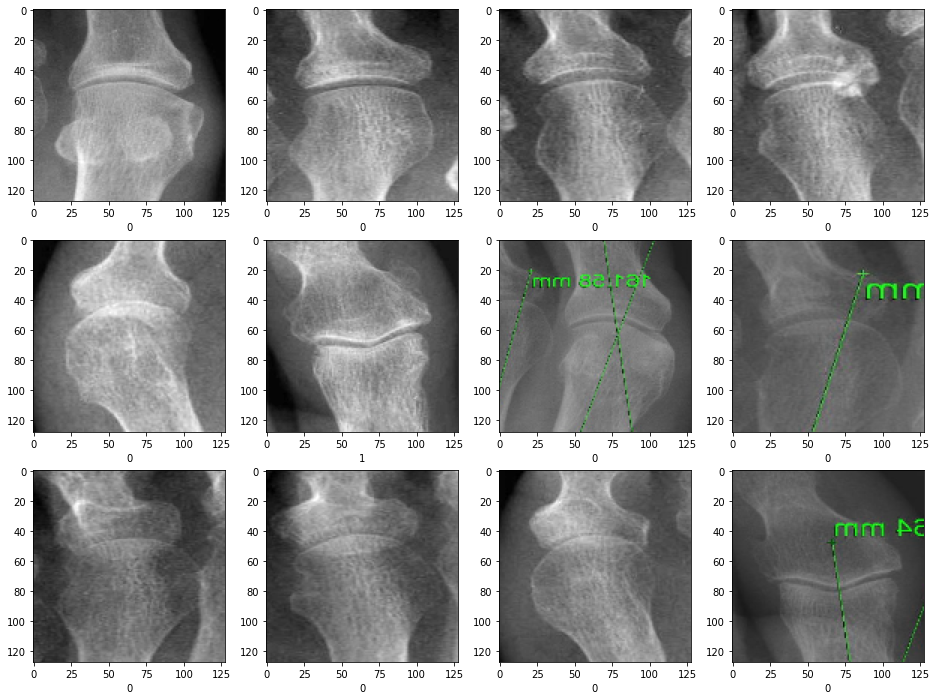

In [0]:
import matplotlib.pyplot as plt

def normalize_image(image):
  return (image - np.min(image))/(np.max(image) - np.min(image))

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 12))
fig = val_datagen.flow(* FEET_EROSION_DATA, batch_size=12, shuffle=False).next()

for i, axis in enumerate(ax.flat):
  pic = fig[0][i]
  axis.imshow(normalize_image(pic))
  axis.set_xlabel( fig[1][i] )

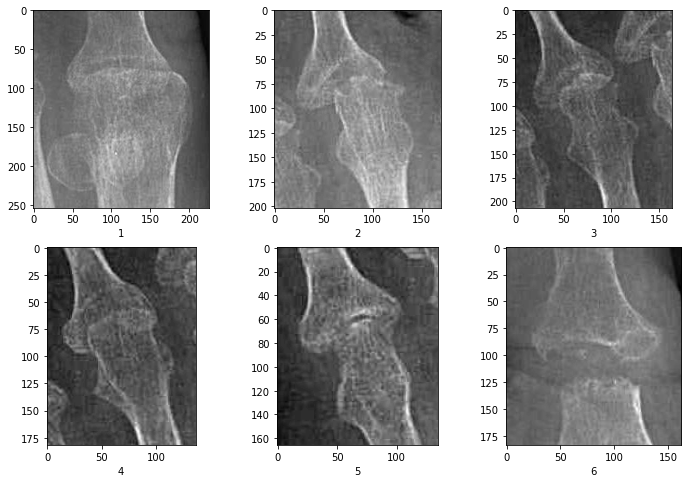

In [0]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))

for i, axis in enumerate(ax.flat):
  pic = training_data['UAB706']['LF'][i+1]
  axis.imshow(normalize_image(pic))
  axis.set_xlabel(
      i+1
  )